# Data Dependencies

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df = pd.read_excel(r'D:\\python\\pga29\\Food Delivery Time Prediction Case Study.xlsx')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [99]:
records = df.shape[0]
print(records ,'records')
features = df.shape[1]
print(features,'features')

45593 records
12 features


In [5]:
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [82]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607,99.301362
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806,1098.942660
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000,1.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000,5.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000,9.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000,14.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,19663.000000


In [8]:
R = 6371

In [9]:
def deg_to_rad(degrees):
    return degrees*(np.pi/180)

In [10]:
def dist(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat2))* np.cos(deg_to_rad(lat2)) *np.sin(d_lon/2)**2
    c = 2* np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [11]:
for i in range(len(df)):
    df.loc[i,'distance'] = dist(df.loc[i,'Restaurant_latitude'],
                                df.loc[i,'Restaurant_longitude'],
                                df.loc[i,'Delivery_location_latitude'],
                                df.loc[i,'Delivery_location_longitude'])

In [70]:
for i in range(len(df)):
    df.loc[i,'distance'] = round(dist(df.loc[i,'Restaurant_latitude'],
                                df.loc[i,'Restaurant_longitude'],
                                df.loc[i,'Delivery_location_latitude'],
                                df.loc[i,'Delivery_location_longitude']))

In [72]:
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

In [71]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.0
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.0
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,2.0
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,8.0
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1.0
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,11.0
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,5.0
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6.0


# Data visualisation

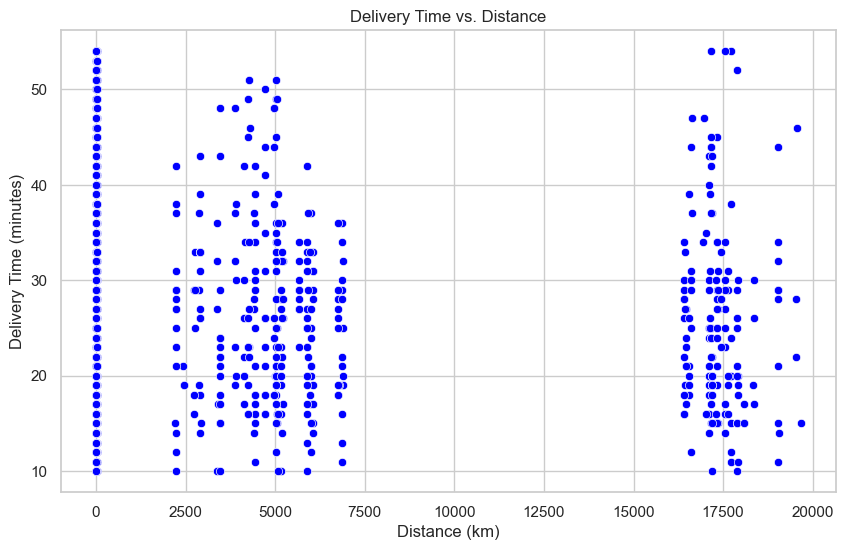

In [73]:
# Scatter plot of Delivery Time vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='Time_taken(min)', data=df, color='blue')
plt.title('Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

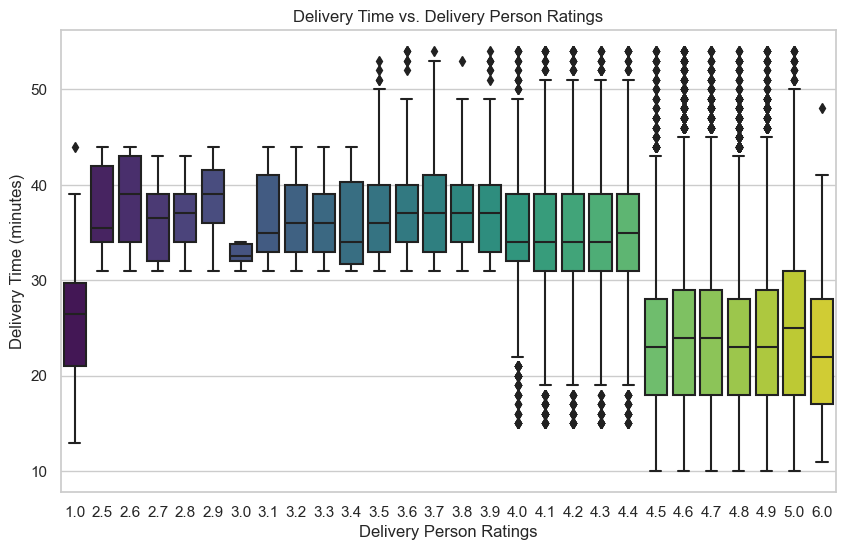

In [78]:
# Boxplot of Delivery Time vs. Delivery Person Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=df, palette='viridis')
plt.title('Delivery Time vs. Delivery Person Ratings')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Delivery Time (minutes)')
plt.show()

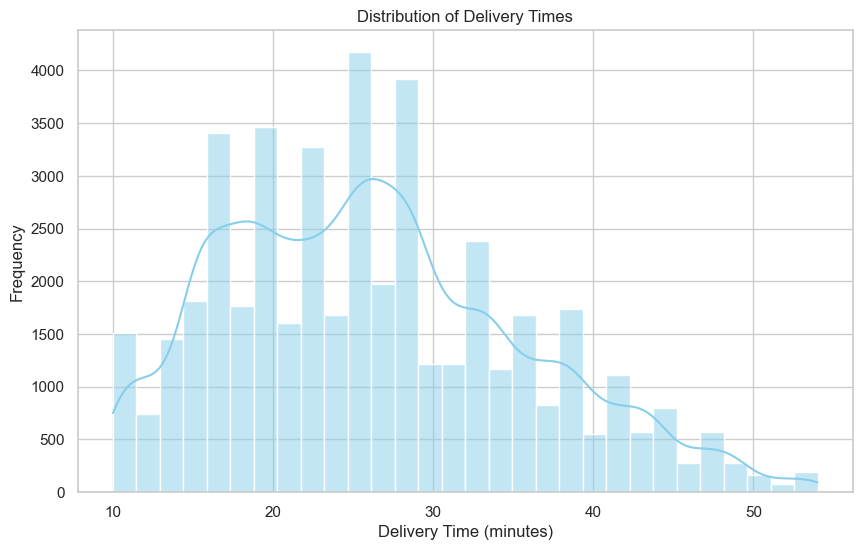

In [68]:
# Plotting the distribution of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken(min)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Predictive Model Building..

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = np.array(df[['Delivery_person_Age','Delivery_person_Ratings','distance']])
y = np.array(df[['Time_taken(min)']])

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.10, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from keras.models import Sequential

In [18]:
from keras.layers import Dense, LSTM

In [19]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
import tensorflow as tf

In [21]:
model.compile(optimizer ='adam', loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=45, epochs=9)


Epoch 1/9

912/912 [==============================] - 33s 22ms/step - loss: 87.6518
Epoch 2/9
912/912 [==============================] - 19s 21ms/step - loss: 64.0511
Epoch 3/9
912/912 [==============================] - 19s 21ms/step - loss: 62.0494
Epoch 4/9
912/912 [==============================] - 19s 21ms/step - loss: 61.0580
Epoch 5/9
912/912 [==============================] - 19s 21ms/step - loss: 60.5147
Epoch 6/9
912/912 [==============================] - 19s 21ms/step - loss: 60.0615
Epoch 7/9
912/912 [==============================] - 19s 21ms/step - loss: 59.1678
Epoch 8/9
912/912 [==============================] - 22s 24ms/step - loss: 59.4109
Epoch 9/9
912/912 [==============================] - 21s 23ms/step - loss: 58.5481


In [22]:
print('Food delivery time prediction')
a= int(input('Age of delivery partner: '))
b= float(input('ratings of previous deliveries'))
c =int(input('Total Distance'))

features = np.array([[a,b,c]])
print('predicted delivery time in minutes = ', model.predict(features))

Food delivery time prediction
Age of delivery partner: 37
ratings of previous deliveries4.9
Total Distance3
1/1 [==============================] - 2s 2s/step
predicted delivery time in minutes =  [[23.965883]]


In [32]:
def predicted_delivery(features):
    predicted_time = model.predict(features)
    print('Predicted delivery time in minutes:', predicted_time[0])
    
    threshold = 30  # Example threshold: 30 minutes
    
    if predicted_time[0] > threshold:
        print('ALARM: The delivery is predicted to be late! please order nearby areas..')
    else:
        print('THE ORDER is ON THE WAYYY...')

In [33]:
a1 = int(input('Age of delivery partner: '))
b1 = float(input('Ratings of previous deliveries: '))
c1 = int(input('Total Distance: '))

Age of delivery partner: 37
Ratings of previous deliveries: 4.9
Total Distance: 3


In [34]:
features = np.array([[a1, b1, c1]])

In [35]:
predicted_delivery(features)

1/1 [==============================] - 0s 60ms/step
Predicted delivery time in minutes: [23.965883]
THE ORDER is ON THE WAYYY...


In [100]:
#RandomForest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [41]:
x1 = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'distance']]
y1 = df['Time_taken(min)']

In [42]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

In [43]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1,test_size=0.10, random_state=42)

In [44]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(xtrain1, ytrain1)

RandomForestRegressor(random_state=42)

In [45]:
input_data = scaler.transform([[a1, b1, c1]])

D:\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
predicted_delivery_time = model.predict(input_data.reshape(1, -1))[0]
print(f'Predicted delivery time in minutes: {predicted_delivery_time}')

Predicted delivery time in minutes: 20.572
